# 4.1 Análise e exploração de dados

1.Construa um gráfico que permita visualizar os níveis médios do poluente O3 nas diversas regiões de 
Portugal (NUTS Code). Indique a região com nível médio de O3 mais elevado. 


/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_29295/2065368421.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3['Air_Pollution_Average[ug/m3]'] = df_portugal_o3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_29295/2065368421.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3['NUTS_Code'] = df_portugal_o3['NUTS_Code'].astype(str)


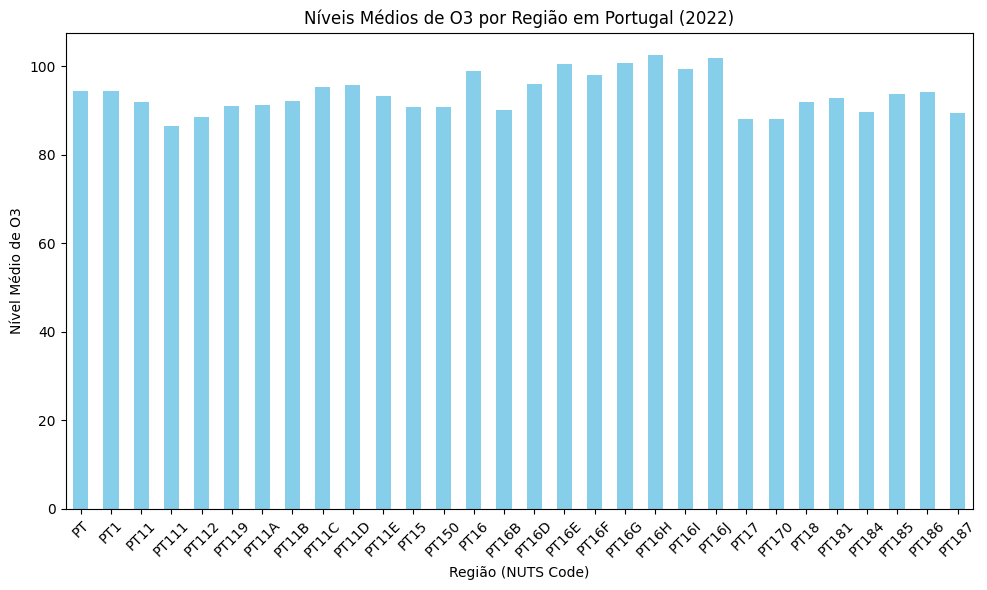

Região com maior nível médio de O3: PT16H (102.4000)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("AIRPOL_data.csv", sep=';')

# Filtrar dados de Portugal e O3
df_portugal_o3 = df[(df['Country'] == 'Portugal') & (df['Air_Pollutant'] == 'O3')]

# Verificar dados
if df_portugal_o3.empty:
    print("Não existem dados de O3 para Portugal.")
    exit()

# Converter a coluna 'Air_Pollution_Average[ug/m3]' para float
df_portugal_o3['Air_Pollution_Average[ug/m3]'] = df_portugal_o3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
df_portugal_o3['NUTS_Code'] = df_portugal_o3['NUTS_Code'].astype(str)

# Calcular média por região (NUTS_Code)
o3_means = df_portugal_o3.groupby('NUTS_Code')['Air_Pollution_Average[ug/m3]'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
o3_means.plot(kind='bar', color='skyblue')
plt.title('Níveis Médios de O3 por Região em Portugal (2022)')
plt.xlabel('Região (NUTS Code)')
plt.ylabel('Nível Médio de O3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificar região com maior nível médio
max_region = o3_means.idxmax()
max_value = o3_means.max()
print(f"Região com maior nível médio de O3: {max_region} ({max_value:.4f})")

2.Usando boxplots, construa um gráfico que permita comparar as distribuições dos níveis médios do
poluente PM2.5 em Portugal, Espanha, Franca e Itália.

Total de dados de PM2.5: 6714
Dados de PM2.5 para os países selecionados:
      Country Air_Pollution_Average[ug/m3]
1141   France                         6,20
1148   France                         4,50
1149   France                         5,20
1157   France                         4,50
1158   France                         4,50
...       ...                          ...
47743   Italy                        11,70
47763   Italy                        11,70
47780   Italy                        11,70
47787   Italy                        11,70
47792   Italy                        11,70

[6714 rows x 2 columns]


/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_29295/1902571124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Air_Pollution_Average[ug/m3]', data=df_pm25, palette='Set2')  # Gera o boxplot


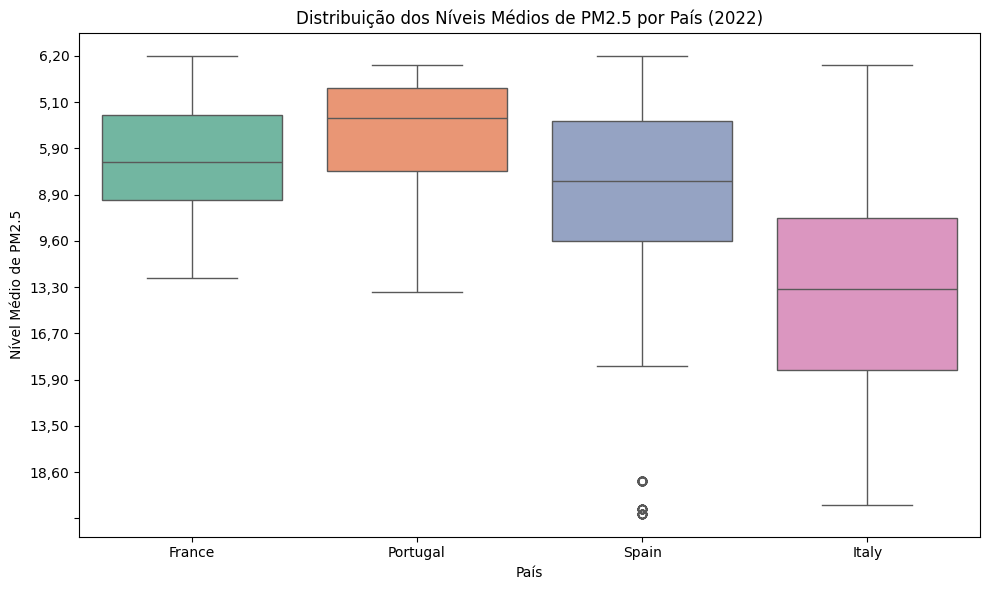

In [7]:
import seaborn as sns

# Filtrar países e PM2.5
countries = ['Portugal', 'Spain', 'France', 'Italy']
df_pm25 = df[(df['Country'].isin(countries)) & (df['Air_Pollutant'] == 'PM2.5')]

print(f"Total de dados de PM2.5: {len(df_pm25)}")

# Verificar se existem dados para os países selecionados
if df_pm25.empty:
    print("Não existem dados de PM2.5 para os países selecionados.")
    exit()

print(f"Dados de PM2.5 para os países selecionados:\n{df_pm25[['Country', 'Air_Pollution_Average[ug/m3]']]}")

# Criar o boxplot
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
sns.boxplot(x='Country', y='Air_Pollution_Average[ug/m3]', data=df_pm25, palette='Set2')  # Gera o boxplot
plt.title('Distribuição dos Níveis Médios de PM2.5 por País (2022)')  # Título
plt.xlabel('País')  # Eixo X
plt.ylabel('Nível Médio de PM2.5')  # Eixo Y
plt.tight_layout()  # Ajusta o layout
plt.yticks(range(0, 101, 10))  # Define os ticks do eixo Y
plt.show()  # Exibe o gráfico

3.Usando  uma  representação  gráfica adequada,  compare  as  distribuições  do  número  de mortes prematuras (Value) em Portugal, Espanha, França e Itália.

/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_29295/1871405587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mortes['Value'] = df_mortes['Value'].str.replace(',', '.').astype(float)


      Country NUTS_Code Air_Pollutant                                Outcome  \
1141   France     FRI22         PM2.5  Chronic obstructive pulmonary disease   
1148   France     FRJ14         PM2.5  Chronic obstructive pulmonary disease   
1149   France     FRK12         PM2.5  Chronic obstructive pulmonary disease   
1157   France     FRJ14         PM2.5                      Diabetes Mellitus   
1158   France     FRJ14         PM2.5                 Ischemic heart disease   
...       ...       ...           ...                                    ...   
47743   Italy        IT         PM2.5  Chronic obstructive pulmonary disease   
47763   Italy        IT         PM2.5                            Lung cancer   
47780   Italy        IT         PM2.5                      Diabetes Mellitus   
47787   Italy        IT         PM2.5                 Ischemic heart disease   
47792   Italy        IT         PM2.5                                 Stroke   

      Affected_Population Populated_Are

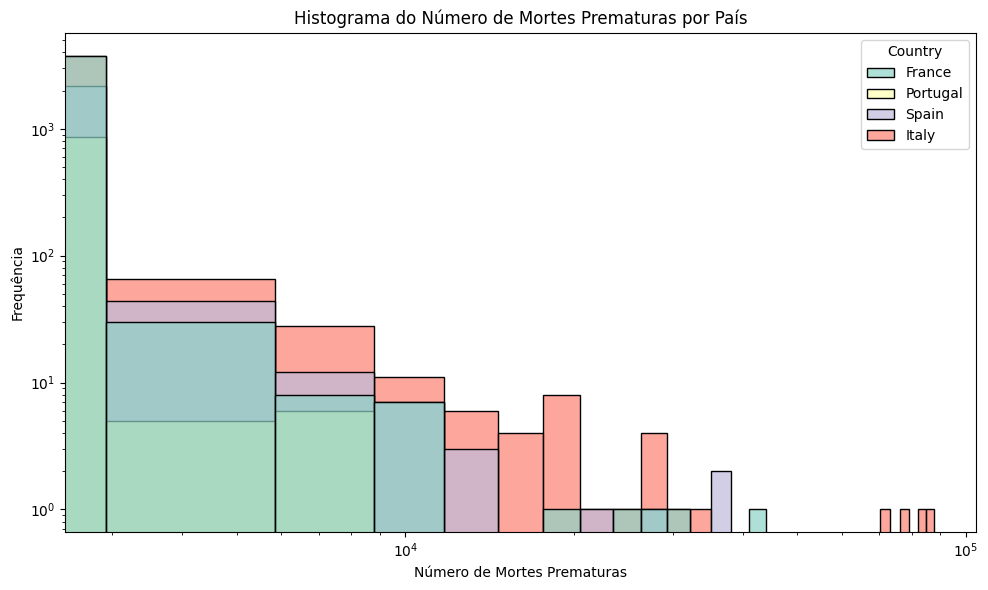

In [ ]:

# Filtrar dados dos países e mortes prematuras
df_mortes = df[df['Country'].isin(countries)]

# Converter a coluna 'Value' para float
df_mortes['Value'] = df_mortes['Value'].str.replace(',', '.').astype(float)

print(df_mortes)

# Criar o density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_mortes, x='Value', hue='Country', fill=True, palette='Set3', alpha=0.5)
plt.title('Density Plot do Número de Mortes Prematuras por País')
plt.xlabel('Número de Mortes Prematuras')
plt.ylabel('Densidade')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()


4.Construa uma tabela que indique, os valores da média, quartis, desvio padrão, assimetria e curtose, do 
número de mortes prematuras (Value) associado a STROKE para cada um dos países: Espanha,  França, 
Itália e Grécia (apresente os resultados com 4 casas decimais)

In [9]:
from scipy.stats import skew, kurtosis

# Filtrar dados de mortes prematuras associadas a STROKE para os países especificados
df_stroke = df[(df['Country'].isin(countries)) & (df['Outcome'] == 'Stroke')]

# Converter a coluna 'Value' para float
df_stroke['Value'] = df_stroke['Value'].str.replace(',', '.').astype(float)

# Função para calcular as estatísticas
def calc_stats(group):
    return pd.Series({
        'Média': group.mean(),
        'Q1': group.quantile(0.25),
        'Mediana': group.median(),
        'Q3': group.quantile(0.75),
        'Desvio Padrão': group.std(),
        'Assimetria': skew(group),
        'Curtose': kurtosis(group)
    })

# Calcular estatísticas por país
stats_table = df_stroke.groupby('Country')['Value'].apply(calc_stats)

# Arredondar para 4 casas decimais
stats_table = stats_table.round(4)

# Exibir a tabela horizontalmente
print(stats_table.unstack().T)


Country           France      Italy  Portugal      Spain
Média           259.1919   668.8781  302.2444   440.9848
Q1                6.0000    21.0000    3.0000    13.0000
Mediana          36.5000    78.0000   19.0000    56.5000
Q3              150.0000   295.2500  128.2500   248.7500
Desvio Padrão  1207.8623  3425.7706  962.9283  1654.5759
Assimetria       16.8619    16.2732    6.0778    11.1475
Curtose         361.7898   338.9293   42.4609   164.9747


/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_29295/193309697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke['Value'] = df_stroke['Value'].str.replace(',', '.').astype(float)
